In [1]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [7]:
#Import libraries
import os
import cv2
import numpy as np
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [4]:
#data path
IMG_SIZE = 64
DATA_PATH = r"D:/cat_dog/PetImages"
CATEGORIES = ['Dog', 'Cat'] 

In [5]:
#labeling images
data = []

for category in CATEGORIES:
    folder = os.path.join(DATA_PATH, category)
    label = CATEGORIES.index(category)
    
    for img_name in tqdm(os.listdir(folder), desc=f"Loading {category}"):
        try:
            img_path = os.path.join(folder, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append([img, to_categorical(label, 2)])
        except:
            pass


Loading Cat: 100%|██████████████████████████████████████████████████████████████| 12499/12499 [02:00<00:00, 103.76it/s]


In [8]:
#data spliting 
data = shuffle(data)
X = np.array([d[0] for d in data]) / 255.0
y = np.array([d[1] for d in data])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 19956, Testing samples: 4990


In [9]:
#model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,452,930 (9.36 MB)

 Trainable params: 2,452,930 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#model traning and testing 
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 47s 156ms/step - accuracy: 0.5558 - loss: 0.6810 - val_accuracy: 0.7019 - val_loss: 0.5787
Epoch 2/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 37s 132ms/step - accuracy: 0.7294 - loss: 0.5421 - val_accuracy: 0.7720 - val_loss: 0.4729
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 37s 132ms/step - accuracy: 0.7934 - loss: 0.4516 - val_accuracy: 0.7981 - val_loss: 0.4329
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 37s 132ms/step - accuracy: 0.8132 - loss: 0.4172 - val_accuracy: 0.8146 - val_loss: 0.4083
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 37s 131ms/step - accuracy: 0.8322 - loss: 0.3717 - val_accuracy: 0.8297 - val_loss: 0.3832
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 37s 131ms/step - accuracy: 0.8547 - loss: 0.3316 - val_accuracy: 0.8342 - val_loss: 0.3732
Epoch 7/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 37s 131ms/step - accuracy: 0.8780 - loss: 0.2849 - val_accuracy: 0.8367 - val_loss: 0.3728
Epoch 8/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 37s 131ms/step - accuracy: 0.8943 - loss: 0

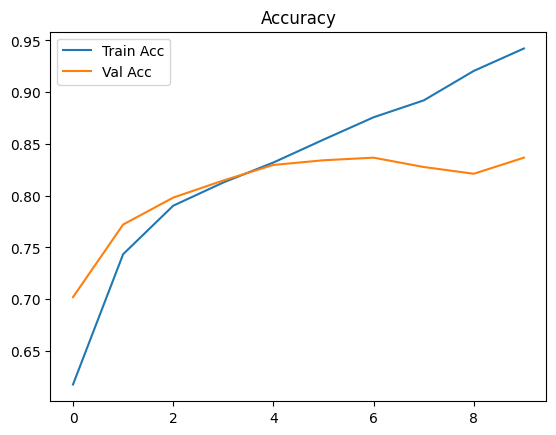

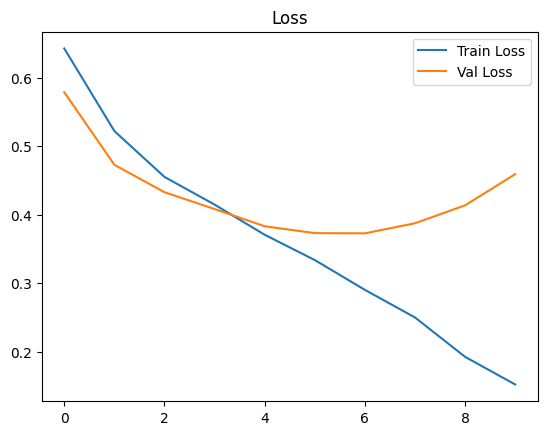

In [11]:
# Ploting (no need though just for my satisfaction)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()


In [19]:
#Prediction 
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.reshape(1, IMG_SIZE, IMG_SIZE, 3) / 255.0
    prediction = model.predict(img)
    print("Prediction:", CATEGORIES[np.argmax(prediction)])

predict_image(r"D:\cat_dog\testing\dog2.jpeg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction: Dog
